<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/Predict_fuel_efficiency(regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [22]:
#hot_encode and fix data
data_one_hot=pd.get_dummies(raw_dataset)
raw_dataset.isna().sum()# we have some empty value here so we want to clear those out 
data=raw_dataset.dropna()
data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})# and we want  to convert our Origin value to  numeric  data

data = pd.get_dummies(data, columns=['Origin'], prefix='', prefix_sep='')
#data=pd.get_dummies(data)


data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [23]:
#set our x and y 
x=data.drop("MPG",axis=1)
y=data["MPG"]
x,y


(     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
 0            8         307.0       130.0  3504.0          12.0          70   
 1            8         350.0       165.0  3693.0          11.5          70   
 2            8         318.0       150.0  3436.0          11.0          70   
 3            8         304.0       150.0  3433.0          12.0          70   
 4            8         302.0       140.0  3449.0          10.5          70   
 ..         ...           ...         ...     ...           ...         ...   
 393          4         140.0        86.0  2790.0          15.6          82   
 394          4          97.0        52.0  2130.0          24.6          82   
 395          4         135.0        84.0  2295.0          11.6          82   
 396          4         120.0        79.0  2625.0          18.6          82   
 397          4         119.0        82.0  2720.0          19.4          82   
 
      Europe  Japan  USA  
 0         0      0    

In [7]:
#split our data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [24]:
#set our normalizer layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(x_train))
print(normalizer.mean.numpy())


[[5.48242807e+00 1.95517578e+02 1.04594246e+02 2.98612476e+03
  1.55440893e+01 7.62076721e+01 1.53354630e-01 2.01277956e-01
  6.45367444e-01]]


In [9]:
#create first model 
tf.random.set_seed(42)
model= tf.keras.Sequential([
normalizer,
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(100,activation="relu"),
tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["mae"])
history=model.fit(x_train,y_train,epochs=250,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
#model evaluation 
model.evaluate(x_test,y_test)


3/3 [==============================] - 0s 4ms/step - loss: 1.9430 - mae: 1.9430


[1.9430358409881592, 1.9430358409881592]

Text(0.5, 0, 'epochs')

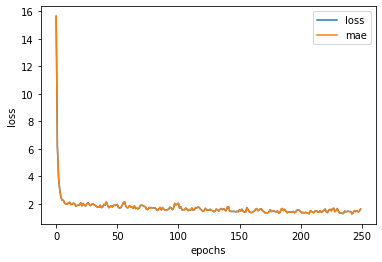

In [11]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
 # plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

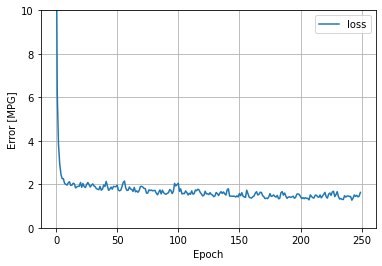

In [29]:
plot_loss(history)

In [26]:
test=tf.constant(test)
model.predict(test)

array([[16.685501]], dtype=float32)